In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [2]:

#reading file
excel_file= pd.ExcelFile("Twelve Year Guardian League Table.xlsx")
sheet_names=excel_file.sheet_names
print(sheet_names)

#sets of datasets 
df_Institution_Level=pd.read_excel(excel_file,sheet_name=sheet_names[0])
df_Subject_Level=pd.read_excel(excel_file,sheet_name=sheet_names[1])
df_Years=pd.read_excel(excel_file,sheet_name=sheet_names[2])
df_Institutions=pd.read_excel(excel_file,sheet_name=sheet_names[3])
df_Subjects=pd.read_excel(excel_file,sheet_name=sheet_names[4])
df_Competitor=pd.read_excel(excel_file,sheet_name=sheet_names[5])


['Institution Level Data', 'Subject Level Data', 'Years', 'Institutions', 'Subjects', 'Competitor Institutions']


## Functions:

In [3]:
def df_info(df):
    print(df.head(10))
    print("\n--------------------------------------------------\n")
    print(df.info())

In [4]:
def df_type(df ,numerical_object_features ):
    print(df.dtypes)

    for feature in numerical_object_features:
        df[feature] = pd.to_numeric(df[feature], errors='coerce')

    print(df.dtypes)

In [5]:
#Note: This function is designed to help make decisions in handling missing data


def df_check_null_values(df ,selected_features):
    print("SUM of missing values:")
    print(df.isnull().sum())
    print("\n--------------------------------------------------\n")
    total_rows_df = df.shape[0]
    missing_percentage_df = (df.isnull().sum() / total_rows_df) * 100
    missing_percentage_df = round(missing_percentage_df, 2)
    print("Percentage of missing values:")
    print(missing_percentage_df)
    print("\n--------------------------------------------------\n")
    # Creating a selected features list to have a look on their distributions to  choose an appropriate imputation method ...
    selected_stats = df[selected_features].dropna().describe()
    print(selected_stats)
    print("\n--------------------------------------------------\n")

In [6]:
def boxplot(df ,selected_features):
    plt.figure(figsize=(10, 12))
    sns.boxplot(data=df[selected_features])
    plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
    plt.title('Boxplot for Each Column')
    plt.xlabel('Columns')
    plt.ylabel('Values')
    plt.show()


In [7]:
def histogram(df ,selected_features):
    plt.figure(figsize=(12, 8))
    row =  math.ceil(len(selected_features)/3)
    for i, feature in enumerate(selected_features):
        plt.subplot(row, 3, i+1)
        sns.histplot(df[feature], kde=True)
        plt.title(feature)

    plt.tight_layout()
    plt.show()

In [8]:
def imputation (df,numerical_features ):
    print("inital:")
    print(df.info())
    print("\n--------------------------------------------------\n")
    # Impute missing values for numerical features using median
    for feature in numerical_features:
       df[feature].fillna(df[feature].median(), inplace=True)
    # Drop 'x' column is in future i decide
    #df.drop(columns=['x'], inplace=True)
    print(df.info())

In [9]:
def duplicate_rows(df, save_csv='no'):
    duplicate_rows_count = df.duplicated().sum()
    print("Duplicate rows:", duplicate_rows_count)
    

    
    if save_csv.lower() == 'yes':
        df[df.duplicated()].to_csv('duplicate_rows.csv', index=False)
        print("Duplicate rows saved to 'duplicate_rows.csv'")
    if duplicate_rows_count > 0:
        
       df = df.drop_duplicates()
    return df

## Institution_Level  
(First sheet )

In [10]:
df_info(df_Institution_Level)

   Year  Rank Institution Satisfied with Course Satisfied with Teaching  \
0  2021    20    Aberdeen                  87.1                    86.1   
1  2020    34    Aberdeen                  86.1                    87.3   
2  2019    51    Aberdeen             86.869499                87.98439   
3  2018    46    Aberdeen             86.730361                88.15468   
4  2017    36    Aberdeen             84.774394               86.550097   
5  2016    41    Aberdeen                  86.4                    86.4   
6  2015    41    Aberdeen             87.951138               88.909696   
7  2014    43    Aberdeen             88.135593               86.516542   
8  2013    38    Aberdeen                    88                      88   
9  2012    45    Aberdeen                    88                      87   

  Satisfied with Feedback Student to Staff Ratio Spend per Student  \
0                    69.5                   16.2               4.4   
1                      71         


Analysis the..
### Data Types

In [11]:
numerical_object_features = ['Satisfied with Course', 'Satisfied with Teaching', 'Satisfied with Feedback', 'Student to Staff Ratio' , 'Spend per Student', 'Value Added Score']

df_type(df_Institution_Level ,numerical_object_features)


Year                         int64
Rank                         int64
Institution                 object
Satisfied with Course       object
Satisfied with Teaching     object
Satisfied with Feedback     object
Student to Staff Ratio      object
Spend per Student           object
Average Entry Tariff       float64
Value Added Score           object
Career after 15 months     float64
Continuation               float64
Guardian Score             float64
dtype: object
Year                         int64
Rank                         int64
Institution                 object
Satisfied with Course      float64
Satisfied with Teaching    float64
Satisfied with Feedback    float64
Student to Staff Ratio     float64
Spend per Student          float64
Average Entry Tariff       float64
Value Added Score          float64
Career after 15 months     float64
Continuation               float64
Guardian Score             float64
dtype: object



Analysis the..
### Missing Values

SUM of missing values:
Year                         0
Rank                         0
Institution                  0
Satisfied with Course       14
Satisfied with Teaching     14
Satisfied with Feedback     15
Student to Staff Ratio       1
Spend per Student            9
Average Entry Tariff         1
Value Added Score            2
Career after 15 months       1
Continuation               951
Guardian Score               0
dtype: int64

--------------------------------------------------

Percentage of missing values:
Year                        0.00
Rank                        0.00
Institution                 0.00
Satisfied with Course       0.98
Satisfied with Teaching     0.98
Satisfied with Feedback     1.05
Student to Staff Ratio      0.07
Spend per Student           0.63
Average Entry Tariff        0.07
Value Added Score           0.14
Career after 15 months      0.07
Continuation               66.27
Guardian Score              0.00
dtype: float64

---------------------------------

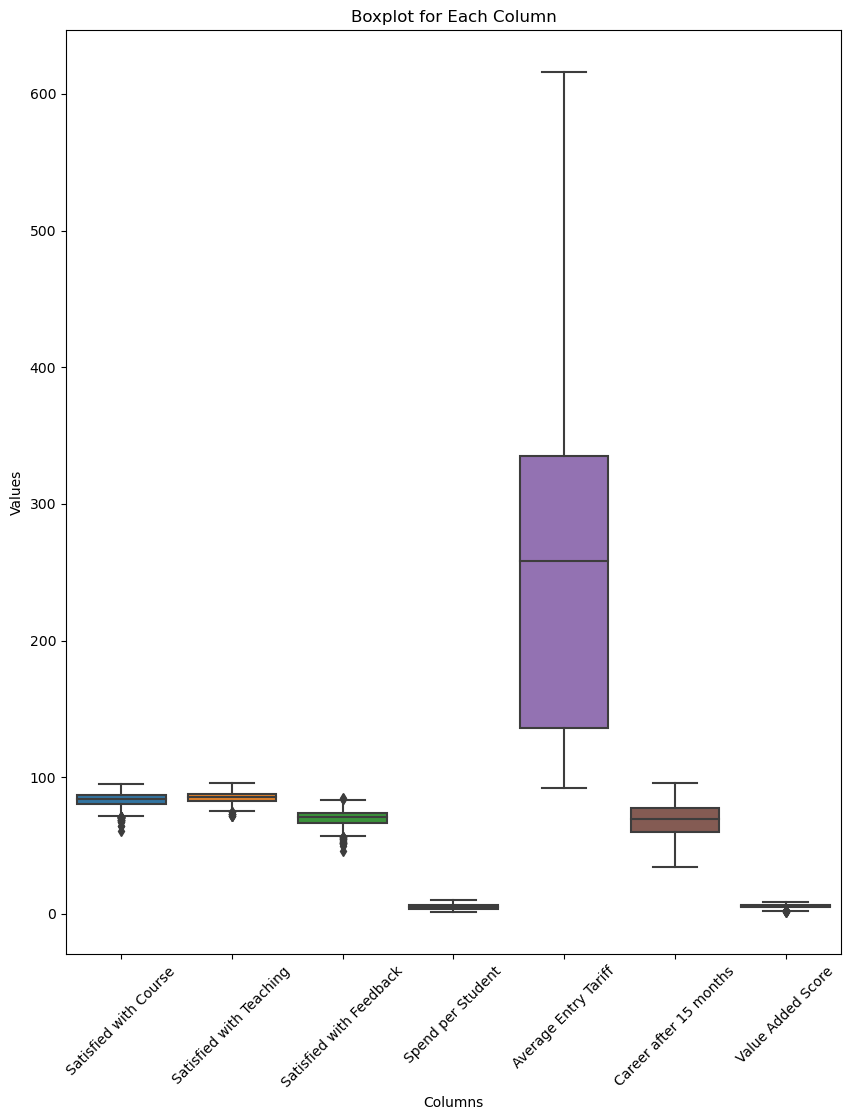

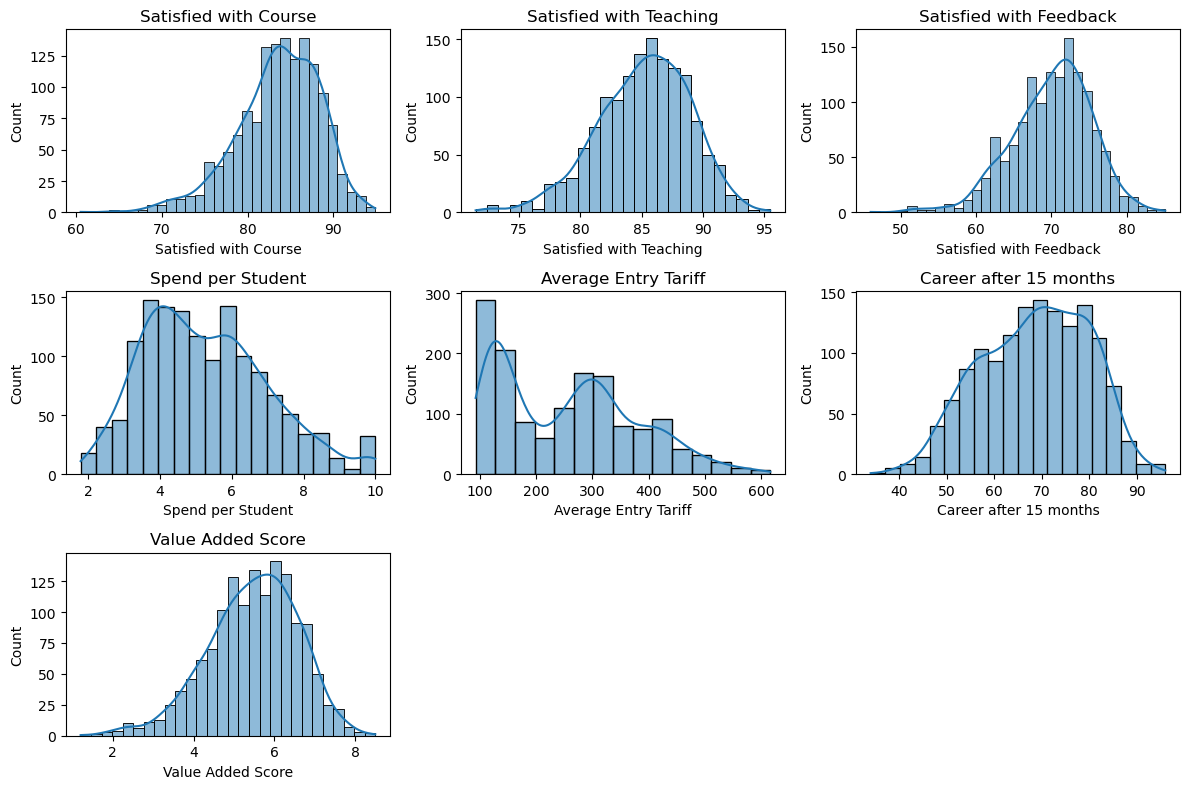

In [12]:
selected_features = ['Satisfied with Course', 'Satisfied with Teaching','Satisfied with Feedback' ,'Spend per Student', 'Average Entry Tariff', 'Career after 15 months', 'Value Added Score']
df_check_null_values(df_Institution_Level,selected_features)
boxplot(df_Institution_Level,selected_features)
histogram(df_Institution_Level,selected_features)

Imputation for for Institution Level dataframe:
Median imputation is particularly useful for data with a skewed distribution, as it provides a more accurate estimate of the central value. We can see that the data is not distributed normally for each variable. The median is a robust measure of central tendency that is less affected by outliers compared to the mean.By taking into consideration outliers in the boxplots and skewnesses of histograms, we can say that, using median for empty cells is a better option.

In [13]:

numerical_features = ['Satisfied with Course', 'Satisfied with Teaching','Satisfied with Feedback','Student to Staff Ratio' ,'Spend per Student', 'Average Entry Tariff', 'Career after 15 months', 'Value Added Score']

imputation (df_Institution_Level,numerical_features)


inital:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1435 entries, 0 to 1434
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Year                     1435 non-null   int64  
 1   Rank                     1435 non-null   int64  
 2   Institution              1435 non-null   object 
 3   Satisfied with Course    1421 non-null   float64
 4   Satisfied with Teaching  1421 non-null   float64
 5   Satisfied with Feedback  1420 non-null   float64
 6   Student to Staff Ratio   1434 non-null   float64
 7   Spend per Student        1426 non-null   float64
 8   Average Entry Tariff     1434 non-null   float64
 9   Value Added Score        1433 non-null   float64
 10  Career after 15 months   1434 non-null   float64
 11  Continuation             484 non-null    float64
 12  Guardian Score           1435 non-null   float64
dtypes: float64(10), int64(2), object(1)
memory usage: 145.9+ KB
None

----


Analysis the..
### Duplicate Rows

In [14]:
df_Institution_Level = duplicate_rows(df_Institution_Level)

Duplicate rows: 0


## Subject Level  
(Second sheet )

In [15]:
df_info(df_Subject_Level)

   Year  Rank         Subject Institution Satisfied with Course  \
0  2019     6  Sports science    Aberdeen             87.125902   
1  2018     1  Sports science    Aberdeen                   NaN   
2  2021    10       Sociology    Aberdeen                  88.5   
3  2020     7       Sociology    Aberdeen                    79   
4  2019    33       Sociology    Aberdeen             85.070941   
5  2018    21       Sociology    Aberdeen                    87   
6  2017    13       Sociology    Aberdeen                    93   
7  2016    28       Sociology    Aberdeen                    83   
8  2015    42       Sociology    Aberdeen                    86   
9  2014    41       Sociology    Aberdeen                    85   

  Satisfied with Teaching Satisfied with Feedback Student to Staff Ratio  \
0               86.083774               79.321293                   17.4   
1                     NaN                     NaN                   15.9   
2                    90.2         


Analysis the..
### Data Types

In [16]:
numerical_object_features = ['Satisfied with Course', 'Satisfied with Teaching', 'Satisfied with Feedback', 'Student to Staff Ratio' , 'Spend per Student','Average Entry Tariff', 'Value Added Score' , 'Career after 15 months','Continuation']

df_type(df_Subject_Level ,numerical_object_features)

Year                         int64
Rank                         int64
Subject                     object
Institution                 object
Satisfied with Course       object
Satisfied with Teaching     object
Satisfied with Feedback     object
Student to Staff Ratio      object
Spend per Student           object
Average Entry Tariff        object
Value Added Score           object
Career after 15 months      object
Continuation                object
Guardian Score             float64
dtype: object
Year                         int64
Rank                         int64
Subject                     object
Institution                 object
Satisfied with Course      float64
Satisfied with Teaching    float64
Satisfied with Feedback    float64
Student to Staff Ratio     float64
Spend per Student          float64
Average Entry Tariff       float64
Value Added Score          float64
Career after 15 months     float64
Continuation               float64
Guardian Score             float64
dtype:


Analysis the..
### Missing Values

In [17]:
len(selected_features)

7

SUM of missing values:
Year                           0
Rank                           0
Subject                        0
Institution                    0
Satisfied with Course        319
Satisfied with Teaching      319
Satisfied with Feedback      441
Student to Staff Ratio       492
Spend per Student            745
Average Entry Tariff         651
Value Added Score           1635
Career after 15 months      7671
Continuation               20859
Guardian Score                 0
dtype: int64

--------------------------------------------------

Percentage of missing values:
Year                        0.00
Rank                        0.00
Subject                     0.00
Institution                 0.00
Satisfied with Course       1.01
Satisfied with Teaching     1.01
Satisfied with Feedback     1.40
Student to Staff Ratio      1.56
Spend per Student           2.36
Average Entry Tariff        2.06
Value Added Score           5.18
Career after 15 months     24.30
Continuation           

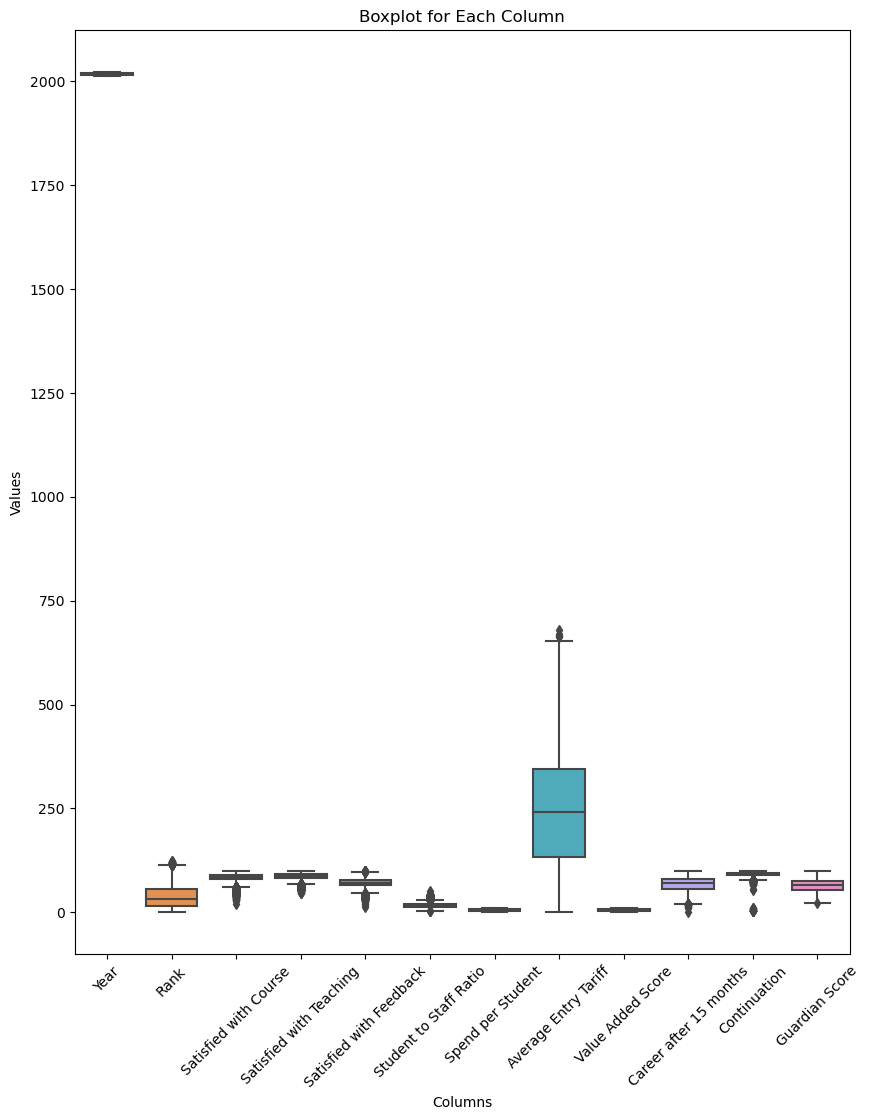

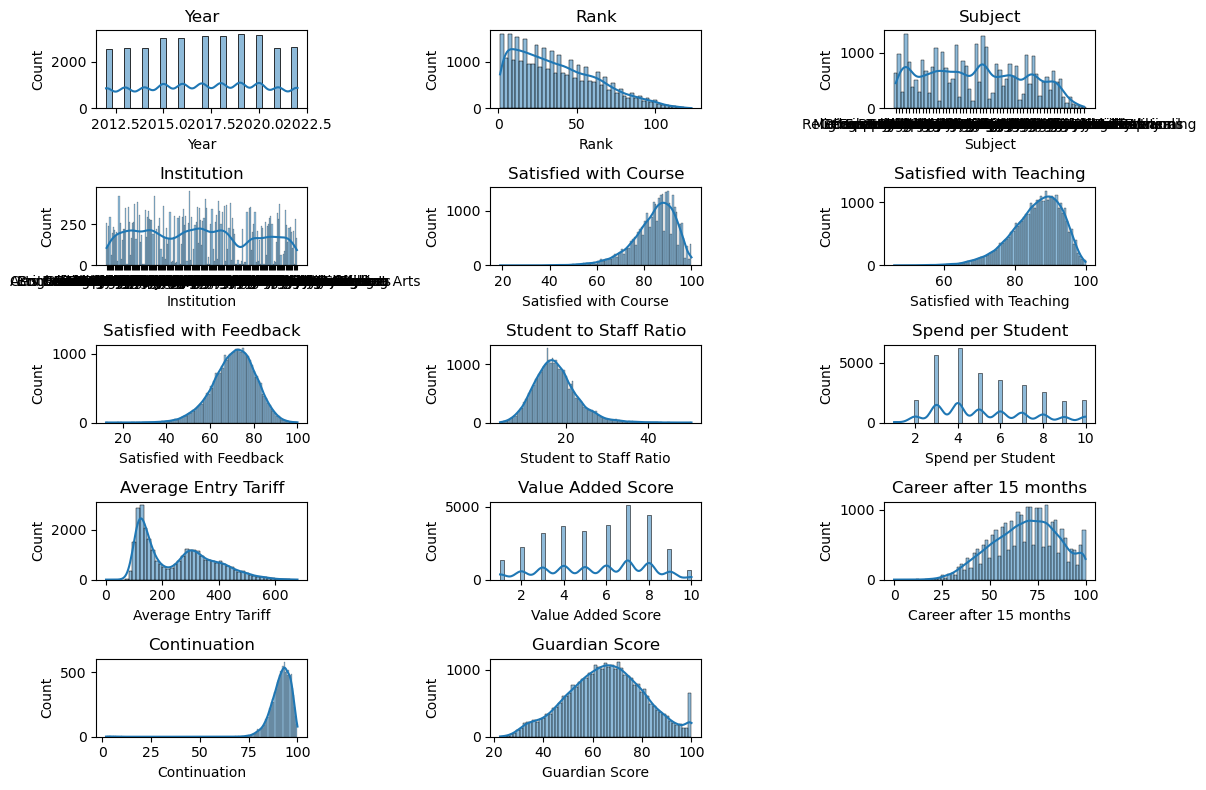

In [18]:
selected_features = df_Subject_Level.columns.tolist()
df_check_null_values(df_Subject_Level,selected_features)
boxplot(df_Subject_Level,selected_features)
histogram(df_Subject_Level,selected_features)

Imputation for for Institution Level dataframe

In [19]:
numerical_features = df_Subject_Level.drop(columns=['Year','Rank','Subject','Institution','Continuation']).columns.tolist()
imputation (df_Subject_Level,numerical_features)


inital:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31574 entries, 0 to 31573
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Year                     31574 non-null  int64  
 1   Rank                     31574 non-null  int64  
 2   Subject                  31574 non-null  object 
 3   Institution              31574 non-null  object 
 4   Satisfied with Course    31255 non-null  float64
 5   Satisfied with Teaching  31255 non-null  float64
 6   Satisfied with Feedback  31133 non-null  float64
 7   Student to Staff Ratio   31082 non-null  float64
 8   Spend per Student        30829 non-null  float64
 9   Average Entry Tariff     30923 non-null  float64
 10  Value Added Score        29939 non-null  float64
 11  Career after 15 months   23903 non-null  float64
 12  Continuation             10715 non-null  float64
 13  Guardian Score           31574 non-null  float64
dtypes: float64(10)


Analysis the..
### Duplicate Rows

In [20]:
duplicate_rows(df_Subject_Level)

Duplicate rows: 109


,Year,Rank,Subject,Institution,Satisfied with Course,Satisfied with Teaching,Satisfied with Feedback,Student to Staff Ratio,Spend per Student,Average Entry Tariff,Value Added Score,Career after 15 months,Continuation,Guardian Score
0,2019,6,Sports science,Aberdeen,87.125902,86.083774,79.321293,17.4,10.0,195.0,6.0,70.0,NaN,88.700000
1,2018,1,Sports science,Aberdeen,85.900000,87.100000,71.595758,15.9,10.0,180.0,10.0,70.0,NaN,100.000000
2,2021,10,Sociology,Aberdeen,88.500000,90.200000,64.000000,24.4,3.0,176.0,8.0,70.0,95.9,76.300003
3,2020,7,Sociology,Aberdeen,79.000000,88.900000,76.400000,19.1,3.0,186.0,10.0,70.0,93.0,85.400002
4,2019,33,Sociology,Aberdeen,85.070941,94.959596,69.411616,18.9,4.0,170.0,4.0,70.0,NaN,71.400000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31569,2022,41,Media & Film Studies,York St John,75.400000,78.400000,72.000000,15.9,2.0,110.0,4.0,70.0,93.3,66.600000
31570,2022,47,Modern Languages & Linguistics,York St John,63.400000,78.900000,73.200000,13.2,5.0,100.0,1.0,70.0,93.3,56.500000
31571,2022,53,Music,York St John,86.400000,93.900000,75.000000,15.5,3.0,105.0,6.0,70.0,85.5,68.500000
31572,2022,64,Psychology,York St John,85.800000,90.100000,79.800000,15.2,3.0,110.0,3.0,54.0,95.6,70.500000


# Excel file 

In [21]:
# Create a new ExcelWriter object
with pd.ExcelWriter("cleaned_ecxel.xlsx") as writer:
    # Write each DataFrame to the Excel file with their respective sheet names
    df_Institution_Level.to_excel(writer, sheet_name="Institution_Level", index=False)
    df_Subject_Level.to_excel(writer, sheet_name="Subject_Level", index=False)
    df_Years.to_excel(writer, sheet_name="Years", index=False)  # Assuming df_Years is updated as well
    df_Institutions.to_excel(writer, sheet_name="Institutions", index=False)
    df_Subjects.to_excel(writer, sheet_name="Subjects", index=False)
    df_Competitor.to_excel(writer, sheet_name="Competitor", index=False)